In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 96.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 36.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
     

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/data_disease_clean2.csv", delimiter=';')
df.head()

,gatal gatal,ruam kulit,erupsi kulit nodal,bersin terus-menerus,menggigil,demam,nyeri sendi,sakit perut,asam lambung,luka pada lidah,...,nafsu makan meningkat,poliuria,riwayat keluarga,dahak mukoid,dahak berkarat,kurang konsentrasi,menerima transfusi darah,menerima suntikan tidak steril,darah dalam dahak,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi Jamur
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi Jamur
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi Jamur
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi Jamur
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi Jamur


In [ ]:
X = df.drop(['prognosis'],axis=1)

y = df.pop('prognosis')

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

y_one_hot = to_categorical(y, num_classes=20)

In [ ]:
X.shape, y.shape, y_one_hot.shape

((2400, 70), (2400,), (2400, 20))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=70, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
    ])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4129 - loss: 2.6270 - val_accuracy: 0.9750 - val_loss: 1.5966
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9941 - loss: 1.3188 - val_accuracy: 1.0000 - val_loss: 0.5359
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4114 - val_accuracy: 1.0000 - val_loss: 0.1753
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1469 - val_accuracy: 1.0000 - val_loss: 0.0809
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0694 - val_accuracy: 1.0000 - val_loss: 0.0479
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0424 - val_accuracy: 1.0000 - val_loss: 0.0317
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0280 - val_accuracy: 1.0000 - val_loss: 0.0227
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0208 - val_accuracy: 1.0000 - val_loss:

In [ ]:
def predict_disease(symptoms):
    symptoms = np.array(symptoms).reshape(1, -1)

    prediction = model.predict(symptoms)

    predicted_class = np.argmax(prediction, axis=1)[0]

    return predicted_class, prediction

In [ ]:
new_symptoms = [1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 0]

predicted_class, prediction_probabilities = predict_disease(new_symptoms)
print(f"Predicted Disease Class: {predicted_class}")
print(f"Prediction Probabilities: {prediction_probabilities}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Predicted Disease Class: 10
Prediction Probabilities: [[7.7164790e-05 4.9533129e-02 8.4176526e-04 1.9000921e-03 5.0996372e-04
  5.8797099e-02 6.4885760e-05 2.3372368e-04 1.2024468e-04 2.9477698e-04
  8.4155858e-01 5.0975144e-05 1.3653448e-04 4.1664796e-04 8.2777209e-05
  4.4355445e-02 5.7511701e-05 7.2143710e-04 1.4779365e-04 9.9493540e-05]]


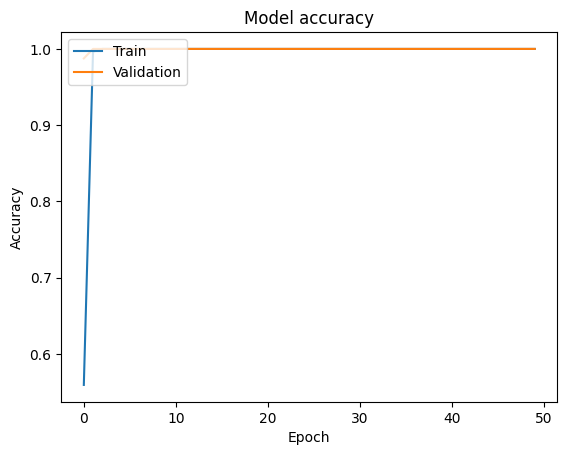

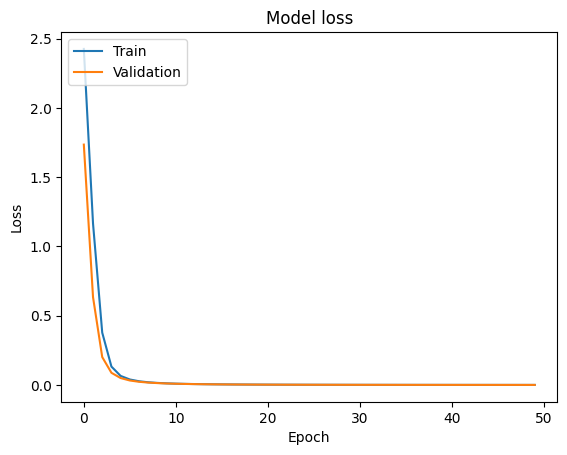

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
print(tf.__version__)

2.16.1


In [ ]:
saved_model_path = "./my_model.h5"

# model.save(saved_model_path)

In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2024-06-10 13:31:55.587882: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-10 13:31:58.465860: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# TF_DF Random Forest

In [ ]:
# Load dataset (example using a CSV file)
df = pd.read_csv('dataset.csv', delimiter=';')
df.head()


,gatal gatal,ruam kulit,erupsi kulit nodal,bersin terus-menerus,menggigil,demam,nyeri sendi,sakit perut,asam lambung,luka pada lidah,...,nafsu makan meningkat,poliuria,riwayat keluarga,dahak mukoid,dahak berkarat,kurang konsentrasi,menerima transfusi darah,menerima suntikan tidak steril,darah dalam dahak,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi Jamur
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi Jamur
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi Jamur
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi Jamur
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi Jamur


In [ ]:
train_df = df.sample(frac=0.9, random_state=42)
test_df = df.drop(train_df.index)

# Define feature and target columns
feature_columns = [col for col in df.columns if col != 'prognosis']
target_column = 'prognosis'

In [ ]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successf

In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label=target_column)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label=target_column)

In [ ]:
modelrf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION)
modelrf.fit(train_ds)


Use /tmp/tmpoq3m18nt as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.384658. Found 2160 examples.
Training model...
Model trained in 0:00:01.848214
Compiling model...


Model compiled.


In [ ]:
modelrf.summary()

Model: "random_forest_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (70):
	asam_lambung
	batuk
	bercak_di_tenggorokan
	berkeringat
	bersin_terus-menerus
	bintik_merah_di_seluruh_tubuh
	dahak
	dahak_berkarat
	dahak_mukoid
	darah_dalam_dahak
	dehidrasi
	demam
	demam_ringan
	demam_tinggi
	denyut_jantung_cepat
	diare
	dischromic__patches
	erupsi_kulit_nodal
	foul_smell_of_urine
	gatal_gatal
	gelisah
	gerakan_berputar
	hilang_nafsu_makan
	hubungan_di_luar_nikah
	kadar_gula_tidak_teratur
	kegemukan
	kehilangan_keseimbangan
	kelelahan
	ketidaknyamanan_kandung_kemih
	ketidakstabilan
	kulit_kekuningan
	kurang_konsentrasi
	lesu
	luka_pada_lidah
	mata_berair
	mata_cekun

In [ ]:
modelrf.compile(metrics=["accuracy"])
modelrf.evaluate(test_ds, return_dict=True)

1/1 [==============================] - 9s 9s/step - loss: 0.0000e+00 - accuracy: 1.0000


{'loss': 0.0, 'accuracy': 1.0}

# YGGDRASIL

In [ ]:
!pip install ydf -U

In [ ]:
# Load libraries
import ydf  # Yggdrasil Decision Forests
import pandas as pd  # We use Pandas to load small datasets

# Download a classification dataset and load it as a Pandas DataFrame.
train_ds = df.sample(frac=0.9, random_state=42)
test_ds = df.drop(train_df.index)

# Print the first 5 training examples
train_ds.head(5)

,gatal gatal,ruam kulit,erupsi kulit nodal,bersin terus-menerus,menggigil,demam,nyeri sendi,sakit perut,asam lambung,luka pada lidah,...,nafsu makan meningkat,poliuria,riwayat keluarga,dahak mukoid,dahak berkarat,kurang konsentrasi,menerima transfusi darah,menerima suntikan tidak steril,darah dalam dahak,prognosis
2037,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Paru-Paru Basah
1978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo
855,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,diabetes
1719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi Saluran Kemih
2019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi Saluran Kemih


In [ ]:
modely = ydf.RandomForestLearner(label="prognosis",
                                task=ydf.Task.CLASSIFICATION).train(train_ds)
# Note: ydf.Task.CLASSIFICATION is the default value of "task"

assert modely.task() == ydf.Task.CLASSIFICATION

Train model on 2160 examples
Model trained in 0:00:01.689636


In [ ]:
evaluation = modely.evaluate(test_ds)

print(evaluation)

accuracy: 1
confusion matrix:
    label (row) \ prediction (col)
    +-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
    |                       |                 Tipes |             Cacar Air |        Demam Berdarah |                Alergi |           Hepatitis A |                  AIDS |            Hipertensi |           Reaksi Obat |           Hepatitis B |              Muntaber |       Paru-Paru Basah |              diabetes |                  Asma |               Malaria |                  GERD |           Hepatitis C |          tu

In [ ]:
evaluation

Label \ Pred,Tipes,Cacar Air,Demam Berdarah,Alergi,Hepatitis A,AIDS,Hipertensi,Reaksi Obat,Hepatitis B,Muntaber,Paru-Paru Basah,diabetes,Asma,Malaria,GERD,Hepatitis C,tuberkulosis,Infeksi Jamur,Vertigo,Infeksi Saluran Kemih
Tipes,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cacar Air,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Demam Berdarah,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Alergi,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Hepatitis A,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AIDS,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Hipertensi,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0
Reaksi Obat,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0
Hepatitis B,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0
Muntaber,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0
